In [50]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import metrics
import math
import json
from math import floor
from sklearn.metrics import r2_score

In [51]:
dataset = pd.read_csv('/content/AQI_delhi.csv')

In [52]:
dataset.head()

,Date,Delhi
0,2015-01-01,472.0
1,2015-01-02,454.0
2,2015-01-03,143.0
3,2015-01-04,319.0
4,2015-01-05,325.0


In [53]:
aqi_arr = dataset['Delhi'].to_numpy()
print(aqi_arr)

[472. 454. 143. ... 233. 114. 101.]


2009


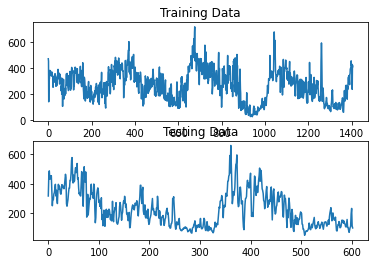

In [54]:
lengths=[0.7, 0.3]           
lookback=1                      

print(len(aqi_arr))

aqi_len=len(aqi_arr)
lim=[floor(aqi_len*lengths[0]),
     floor(aqi_len*(lengths[0]+lengths[1]))]

TrainingData=aqi_arr[:lim[0]]
TestData=aqi_arr[lim[0]:lim[1]]

fig, axs = plt.subplots(2)
axs[0].plot(TrainingData)
axs[0].set_title('Training Data')
axs[1].plot(TestData)
axs[1].set_title('Testing Data')

Xtrain,Ytrain=[],[]
Xtest,Ytest=[],[]


Xtraining=TrainingData[:-1]
Ytraining=TrainingData[1:]
for i in range(len(Xtraining)-lookback+1):
  Xtrain.append(Xtraining[i:i+lookback])
  Ytrain.append(Ytraining[i+lookback-1])

Xtesting=TestData[:-1]
Ytesting=TestData[1:]
for i in range(len(Xtesting)-lookback+1):
  Xtest.append(Xtesting[i:i+lookback])
  Ytest.append(Ytesting[i+lookback-1])

Xtrain=np.array(Xtrain)
Ytrain=np.array(Ytrain)
Xtest=np.array(Xtest)
Ytest=np.array(Ytest)

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_X_train=sc.fit_transform(Xtrain)
sc_X_test=sc.fit_transform(Xtest)


In [56]:
from sklearn.linear_model import ElasticNet
model_enet = ElasticNet(alpha = 0.01)

In [57]:
model_enet.fit(sc_X_train, Ytrain)

ElasticNet(alpha=0.01)

In [58]:
y_pred_elasticnet = model_enet.predict(sc_X_test)


In [59]:
X1=np.arange(0,len(Ytest))

Text(0.5, 1.0, 'Elastic Net')

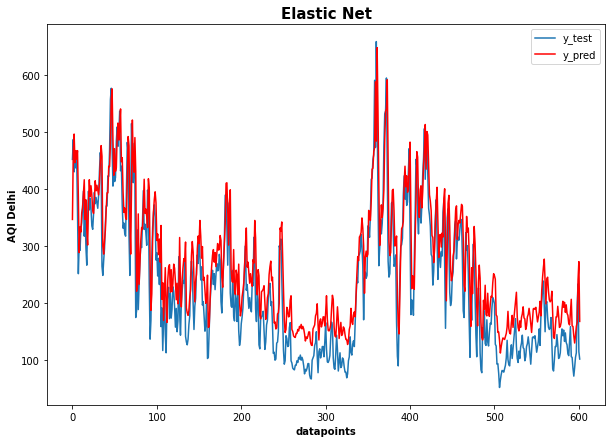

In [60]:
# plot forecasts against actual outcomes
fig, ax = plt.subplots(figsize = (10,7))
ax.plot(Ytest,label = 'y_test')
ax.plot(y_pred_elasticnet, color='red',label = 'y_pred')
ax.legend()
plt.ylabel('AQI Delhi',fontweight='bold')
plt.xlabel('datapoints',fontweight='bold')
plt.title('Elastic Net',fontweight='bold',fontsize=15)

In [61]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,median_absolute_error,r2_score

print("R2 Score = ",r2_score(Ytest, y_pred_elasticnet))
print("Variance Score = ",explained_variance_score(Ytest, y_pred_elasticnet))
print("\nMean Absolute Error (MAE) = ",mean_absolute_error(Ytest, y_pred_elasticnet))
print("Mean Squared Error (MSE) = ",mean_squared_error(Ytest, y_pred_elasticnet))
print("Root Mean Squared Error (RMSE) = ",mean_squared_error(Ytest, y_pred_elasticnet,squared=False))
print("Mean Absolute Percentage Error (MAPE) = ",mean_absolute_percentage_error(Ytest, y_pred_elasticnet))
print("Meadian Relative Absolute Error (MRAE) = ",median_absolute_error(Ytest, y_pred_elasticnet))

R2 Score =  0.7188595170608472
Variance Score =  0.8303742199422799

Mean Absolute Error (MAE) =  51.318558542882535
Mean Squared Error (MSE) =  4000.5312427772246
Root Mean Squared Error (RMSE) =  63.24975290684719
Mean Absolute Percentage Error (MAPE) =  0.31983621977558174
Meadian Relative Absolute Error (MRAE) =  46.78725318122528


In [62]:
elastic_net_res=[r2_score(Ytest, y_pred_elasticnet),
         explained_variance_score(Ytest, y_pred_elasticnet),
         mean_absolute_error(Ytest, y_pred_elasticnet),
         mean_absolute_percentage_error(Ytest, y_pred_elasticnet),
         mean_squared_error(Ytest, y_pred_elasticnet,squared=False)]
print("elastic_net_res =",elastic_net_res)

elastic_net_res = [0.7188595170608472, 0.8303742199422799, 51.318558542882535, 0.31983621977558174, 63.24975290684719]
